In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# use CMU Serif
import matplotlib as mpl
import matplotlib.font_manager as font_manager
mpl.rcParams['font.family']='serif'
# cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
cmfont = font_manager.FontProperties('/Users/theoares/Library/Fonts/cmunrm.otf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.transforms import Bbox

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import itertools

n_boot = 50
from utils import *

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['/Users/theoares/Library/Fonts/cmunrm.otf'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


## Play with the Gqq, Gqg correlators

In [2]:
l = 48
t = 96
L = Lattice(l, t)
V = (l ** 3) * t

In [3]:
# read in qlua output
jobid = 90712
data_dir = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/meas/cl21_48_96_b6p3_m0p2416_m0p2050_' + str(jobid)
unsorted_cfgs = []
unsorted_cfgids = []
for (dirpath, dirnames, file) in os.walk(data_dir):
    unsorted_cfgs.extend(file)
    for fi in file:
        unsorted_cfgids.append(int(fi[3 : 7]))    # slicing only good for cfgs in the 1000's
for idx, cfg in enumerate(unsorted_cfgs):
    unsorted_cfgs[idx] = data_dir + '/' + unsorted_cfgs[idx]
n_cfgs = len(unsorted_cfgs)
print('Reading ' + str(n_cfgs) + ' configs.')
print(unsorted_cfgids)

Reading 32 configs.
[1480, 1490, 1390, 1380, 1170, 1160, 1280, 1140, 1290, 1300, 1240, 1180, 1310, 1270, 1330, 1320, 1260, 1220, 1360, 1370, 1230, 1350, 1210, 1200, 1340, 1470, 1460, 1500, 1450, 1400, 1420, 1430]


In [4]:
# get glue pieces
glue_dir = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/glue_ops/cfgs_1100_1500/'
path_glue_ids = glue_dir + 'ops_for_patrick.txt'
path_glue_emt = glue_dir + 'ops_for_patrick.npy'
glue_emt_all = np.load(path_glue_emt)
glue_ids = []
with open(path_glue_ids, 'r') as f:
    for line in f:
        glue_ids.append(int(line.split('cfg_')[1][:-1]))

In [5]:
# sort all cfgs
cfgids = sorted(unsorted_cfgids)
cfgs = [x for _, x in sorted(zip(unsorted_cfgids, unsorted_cfgs), key = lambda pair: pair[0])]
glue_emt = np.array([glue_emt_all[ii] for ii in range(len(glue_ids)) if glue_ids[ii] in cfgids])

In [6]:
# read in quark / glue stuff and bootstrap
k = np.array([3, 0, 0, 0])
props, Gqg_qlua, Gqq3, Gqq6 = readfiles(cfgs, k)
props_b = bootstrap(props)
glue_emt_b = bootstrap(glue_emt)
Gqq3_b = np.array([bootstrap(Gqq3[a]) for a in range(3)])
Gqq6_b = np.array([bootstrap(Gqq6[a]) for a in range(6)])
Gqg = np.einsum('zmn,zaibj->mnzaibj', glue_emt, props)
Gqg3, Gqg6 = form_2d_sym_irreps(Gqg)
Gqg3_b = np.array([bootstrap(Gqg3[a]) for a in range(3)])
Gqg6_b = np.array([bootstrap(Gqg6[a]) for a in range(6)])

In [7]:
Gqq3_mu = np.mean(Gqq3_b, axis = 1)
Gqq3_sigma = np.std(Gqq3_b, axis = 1, ddof = 1)
Gqq6_mu = np.mean(Gqq6_b, axis = 1)
Gqq6_sigma = np.std(Gqq6_b, axis = 1, ddof = 1)
Gqg3_mu = np.mean(Gqg3_b, axis = 1)
Gqg3_sigma = np.std(Gqg3_b, axis = 1, ddof = 1)
Gqg6_mu = np.mean(Gqg6_b, axis = 1)
Gqg6_sigma = np.std(Gqg6_b, axis = 1, ddof = 1)

## See what the stats look like

In [8]:
# try running on 4 nodes instead of 5-- not sure why the second job (89346) has bad data

In [9]:
l = 48
t = 96
# L = Lattice(l, t)

In [10]:
# path = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/analysis_output/Z_89127.h5'
path = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/analysis_output/Z_90712.h5'
f = h5py.File(path, 'r')
k_list = f['momenta'][()]
mom_list = [L.to_linear_momentum(k + bvec, datatype = np.float64) for k in k_list]
apsq_list = [square(p) for p in mom_list]
Zq = f['Zq'][()]
glue_emt = f['glue_emt'][()]
props = f['props'][()]
Gamma_qg3 = f['Gamma_qg3'][()]
Gamma_qg6 = f['Gamma_qg6'][()]
Gamma_qq3 = f['Gamma_qq3'][()]
Gamma_qq6 = f['Gamma_qq6'][()]
f.close()

In [11]:
colors = ['b', 'b', 'b', 'b', 'r', 'r', 'r']

<IPython.core.display.Javascript object>


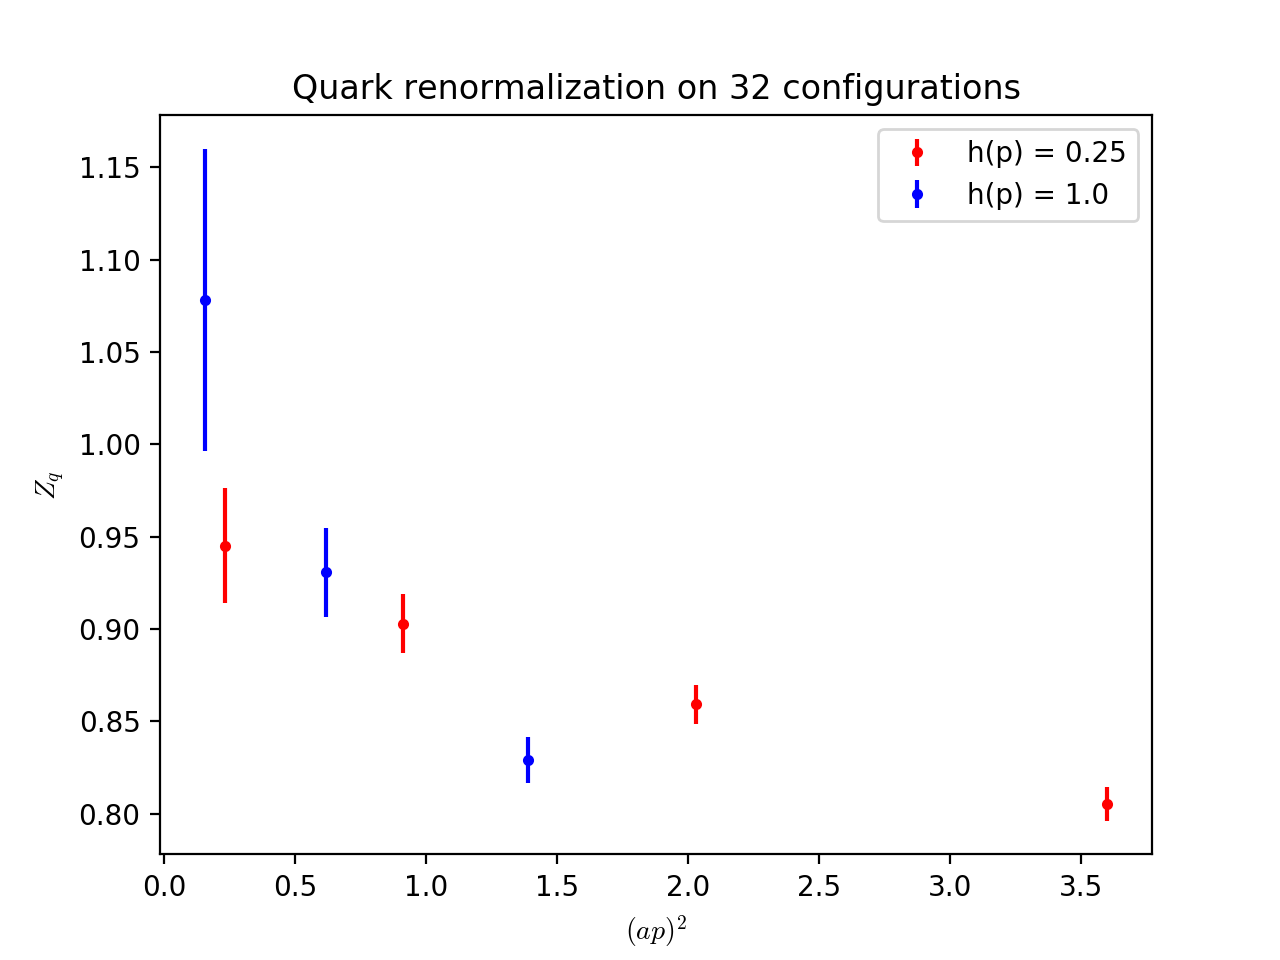

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [12]:
Zq_mu = np.mean(Zq, axis = 1)
Zq_std = np.std(Zq, axis = 1, ddof = 1)
plt.figure()
plt.errorbar(apsq_list[:4], Zq_mu[:4], Zq_std[:4], c = 'r', fmt = '.', label = 'h(p) = 0.25')
plt.errorbar(apsq_list[4:], Zq_mu[4:], Zq_std[4:], c = 'b', fmt = '.', label = 'h(p) = 1.0')

plt.xlabel('$(ap)^2$')
plt.ylabel('$Z_q$')
plt.title('Quark renormalization on 32 configurations')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


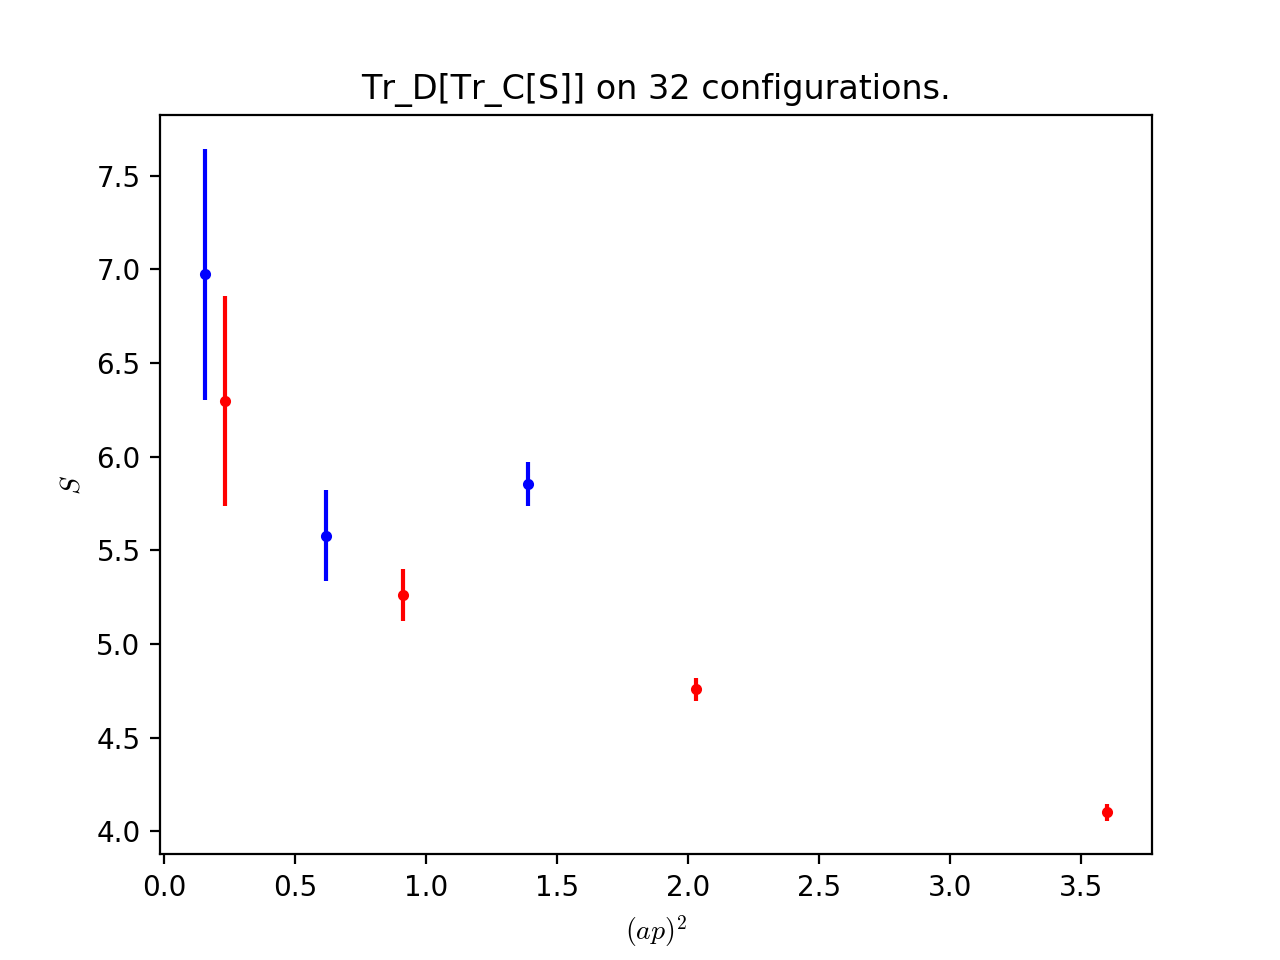

In [13]:
propsTr = np.einsum('pzaiai->pz', props)
propsTr_mu = np.mean(propsTr, axis = 1)
propsTr_std = np.std(propsTr, axis = 1, ddof = 1)

plt.figure()
plt.errorbar(apsq_list[:4], propsTr_mu[:4], propsTr_std[:4], c = 'r', fmt = '.', label = 'h(p) = 0.25')
plt.errorbar(apsq_list[4:], propsTr_mu[4:], propsTr_std[4:], c = 'b', fmt = '.', label = 'h(p) = 1.0')
plt.xlabel('$(ap)^2$')
plt.ylabel('$S$')
plt.title('Tr_D[Tr_C[S]] on 32 configurations.')
plt.show()

In [14]:
props.shape

(7, 50, 3, 4, 3, 4)

<IPython.core.display.Javascript object>


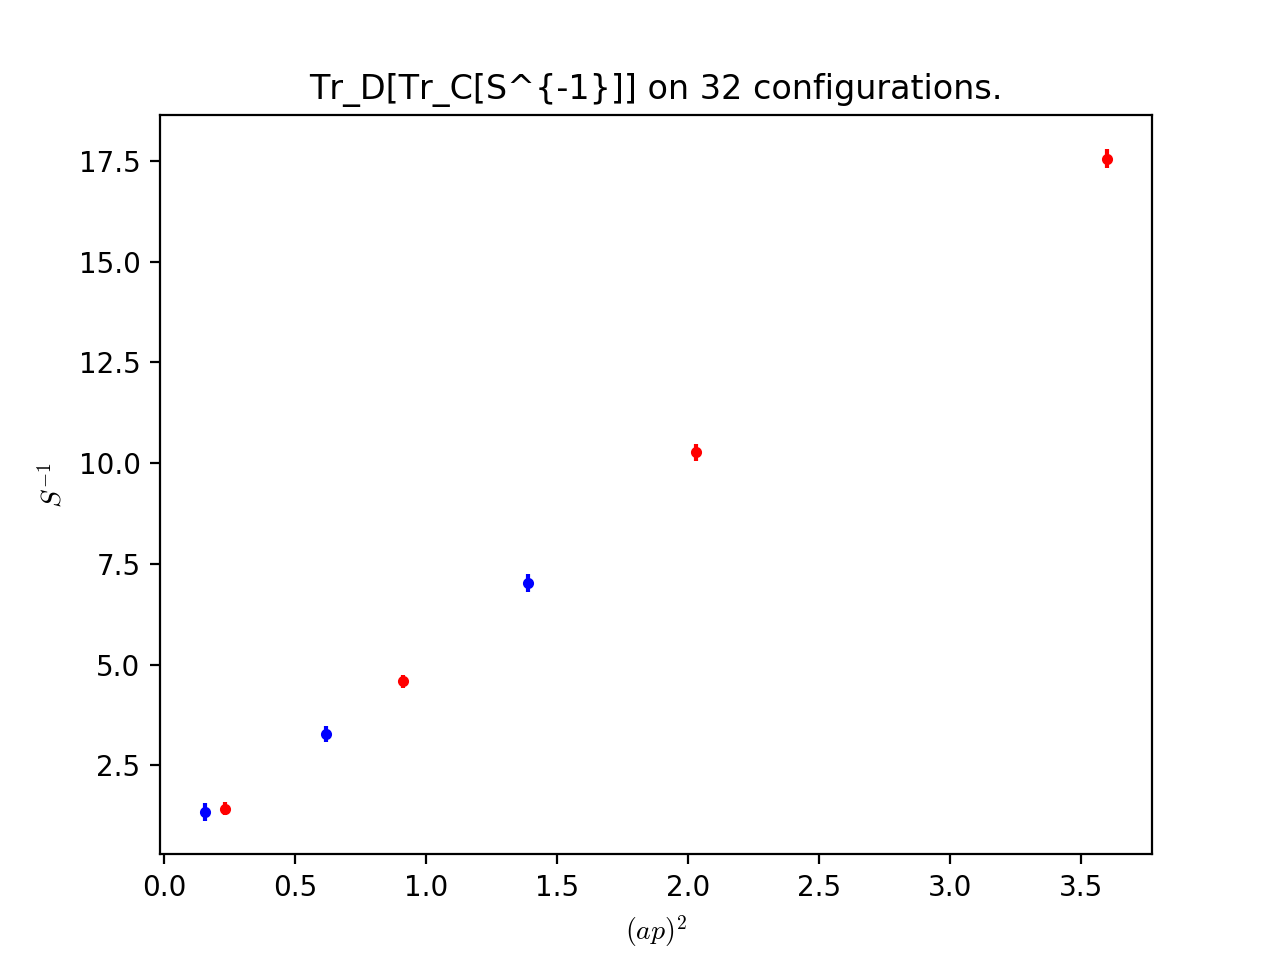

In [15]:
props_inv = np.array([invert_props(props[p]) for p in range(len(apsq_list))])
propsInvTr = np.einsum('pzaiai->pz', props_inv)
propsInvTr_mu = np.mean(propsInvTr, axis = 1)
propsInvTr_std = np.std(propsInvTr, axis = 1, ddof = 1)

# TODO look at off diagonal, if S(p) ~ 0 then it might blow up

plt.figure()
plt.errorbar(apsq_list[:4], propsInvTr_mu[:4], propsInvTr_std[:4], c = 'r', fmt = '.', label = 'h(p) = 0.25')
plt.errorbar(apsq_list[4:], propsInvTr_mu[4:], propsInvTr_std[4:], c = 'b', fmt = '.', label = 'h(p) = 1.0')
plt.xlabel('$(ap)^2$')
plt.ylabel('$S^{-1}$')
plt.title('Tr_D[Tr_C[S^{-1}]] on 32 configurations.')
plt.show()

In [16]:
glue_emt_mu = np.mean(glue_emt, axis = 0)
glue_emt_std = np.std(glue_emt, axis = 0, ddof = 1)
print('glue emt = ' + str(glue_emt_mu) + ' \pm ' + str(glue_emt_std))

glue emt = [[-6.3871681e+05+0.j  9.6702148e+01+0.j -1.9694864e+00+0.j
   1.1603106e+02+0.j]
 [ 9.6702148e+01+0.j -6.3890925e+05+0.j  1.6075146e+02+0.j
   1.0425608e+02+0.j]
 [-1.9694864e+00+0.j  1.6075146e+02+0.j -6.3917538e+05+0.j
   6.9358940e+01+0.j]
 [ 1.1603106e+02+0.j  1.0425608e+02+0.j  6.9358940e+01+0.j
  -6.3893681e+05+0.j]] \pm [[453.12097   94.33288   90.05134  112.573074]
 [ 94.33288  432.63602  140.45341  101.8259  ]
 [ 90.05134  140.45341  400.75943  150.34732 ]
 [112.573074 101.8259   150.34732  473.7684  ]]


<IPython.core.display.Javascript object>


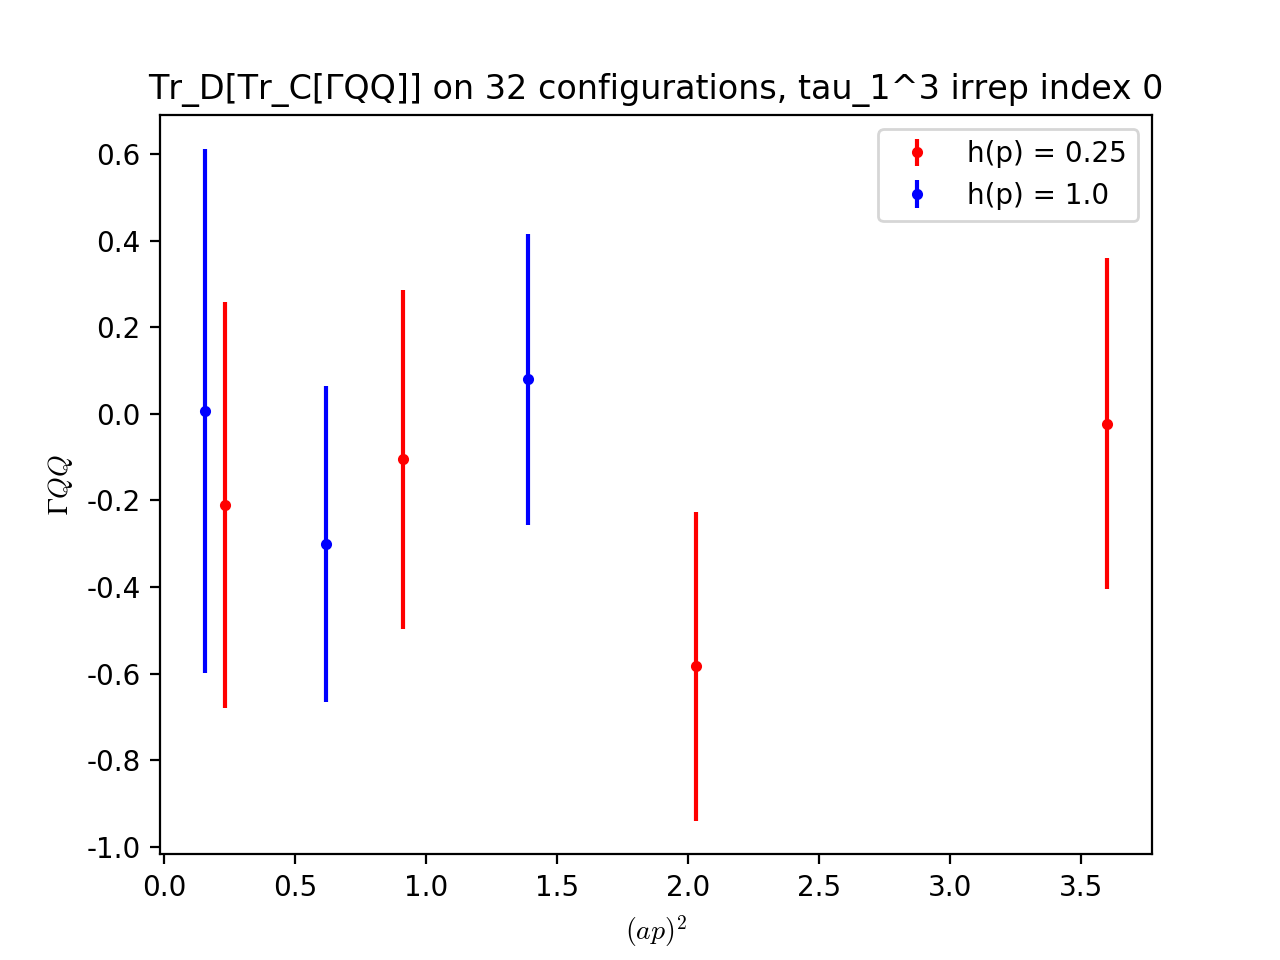

<IPython.core.display.Javascript object>


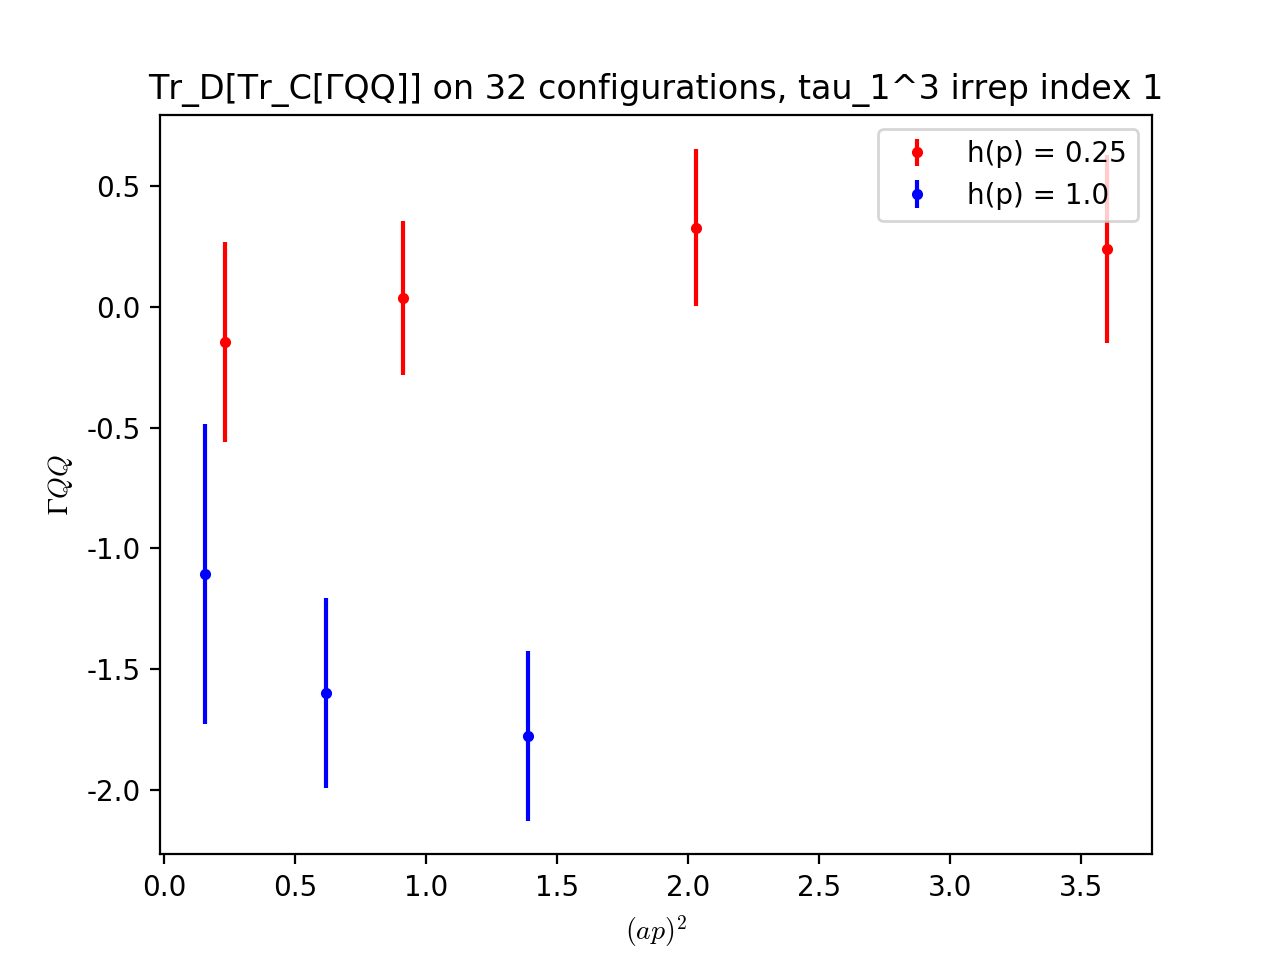

<IPython.core.display.Javascript object>


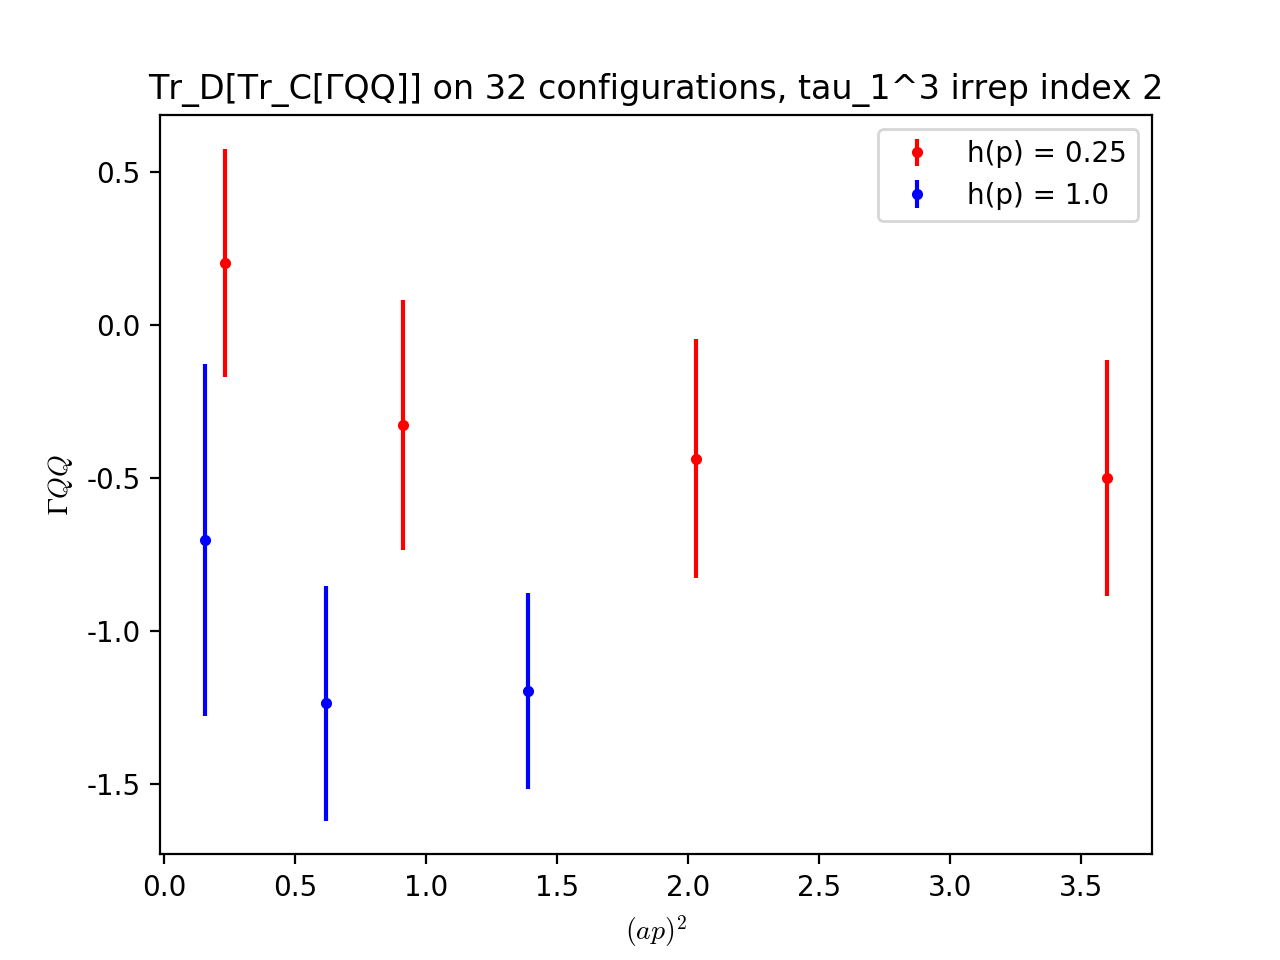

In [17]:
Gamma_qq3Tr = np.einsum('pyzaiai->ypz', Gamma_qq3)
Gamma_qq3Tr_mu = np.mean(Gamma_qq3Tr, axis = 2)
Gamma_qq3Tr_std = np.std(Gamma_qq3Tr, axis = 2, ddof = 1)

for a in range(3):
    plt.figure()
    plt.errorbar(apsq_list[:4], Gamma_qq3Tr_mu[a, :4], Gamma_qq3Tr_std[a, :4], c = 'r', fmt = '.', label = 'h(p) = 0.25')
    plt.errorbar(apsq_list[4:], Gamma_qq3Tr_mu[a, 4:], Gamma_qq3Tr_std[a, 4:], c = 'b', fmt = '.', label = 'h(p) = 1.0')

    plt.xlabel('$(ap)^2$')
    plt.ylabel('$ΓQQ$')
    plt.title('Tr_D[Tr_C[ΓQQ]] on 32 configurations, tau_1^3 irrep index ' + str(a))
    plt.legend()
    plt.show()

In [30]:
glue_emt_b.shape

(50, 4, 4)

In [37]:
glue_emt_mu.shape

(4, 4)

In [34]:
props_inv_mu.shape

(7, 3, 4, 3, 4)

In [38]:
props_inv_mu = np.mean(props_inv, axis = 1)
normalization_mn = np.einsum('paibj,mn->mnpaibj', props_inv_mu, glue_emt_mu)
norm3, norm6 = form_2d_sym_irreps(normalization_mn)

In [49]:
GamQG = np.einsum('pzaibj,zmn->mnpzaibj', props_inv, glue_emt_b)
GamQG_3, GamQG_6 = form_2d_sym_irreps(GamQG)
n_boot = props_inv.shape[1]
for b in range(n_boot):
    GamQG_3[:, :, b, :, :, :, :] = GamQG_3[:, :, b, :, :, :, :] - norm3[:, :, :, :, :, :]
    GamQG_6[:, :, b, :, :, :, :] = GamQG_6[:, :, b, :, :, :, :] - norm6[:, :, :, :, :, :]
# GamQG_3 = np.einsum('ypzaibj,ypaibj->ypzaibj', GamQG_3, 1 / norm3)
# GamQG_6 = np.einsum('ypzaibj,ypaibj->ypzaibj', GamQG_6, 1 / norm6)
GamQG_3Tr = np.einsum('ypzaiai->ypz', GamQG_3)
GamQG_3Tr_mu = np.mean(GamQG_3Tr, axis = 2)
GamQG_3Tr_std = np.std(GamQG_3Tr, axis = 2, ddof = 1)
# GamQG_3_mu = np.mean(GamQG_3, axis = 2)
# GamQG_3_std = np.std(GamQG_3, axis = 2, ddof = 1)

<IPython.core.display.Javascript object>


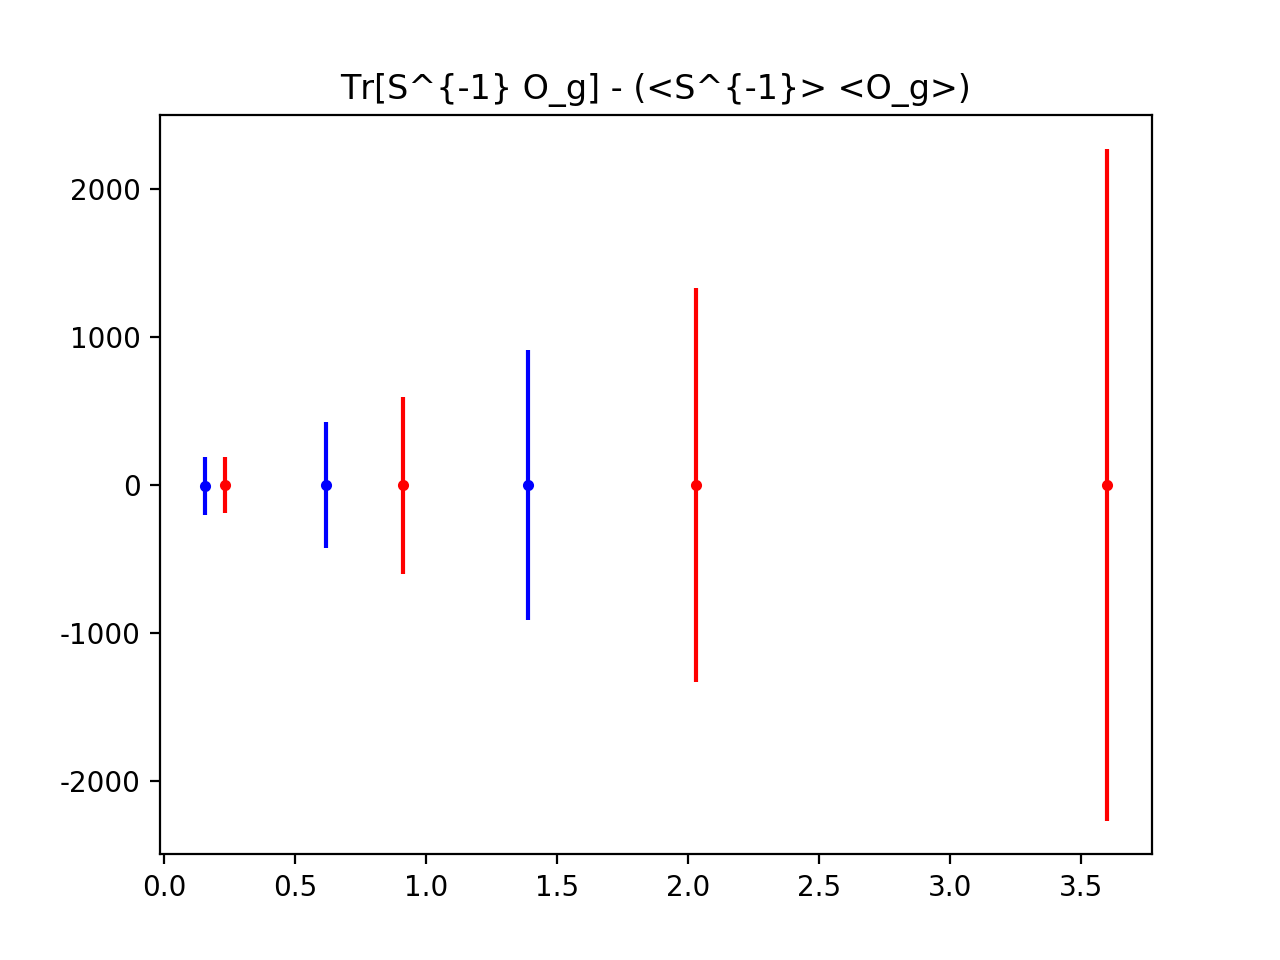

In [51]:
plt.figure()
plt.errorbar(apsq_list[:4], GamQG_3Tr_mu[0, :4], GamQG_3Tr_std[0, :4], c = 'r', fmt = '.', label = 'h(p) = 0.25')
plt.errorbar(apsq_list[4:], GamQG_3Tr_mu[0, 4:], GamQG_3Tr_std[0, 4:], c = 'b', fmt = '.', label = 'h(p) = 1.0')
plt.title('Tr[S^{-1} O_g] - <S^{-1}> <O_g>')
plt.show()

<IPython.core.display.Javascript object>


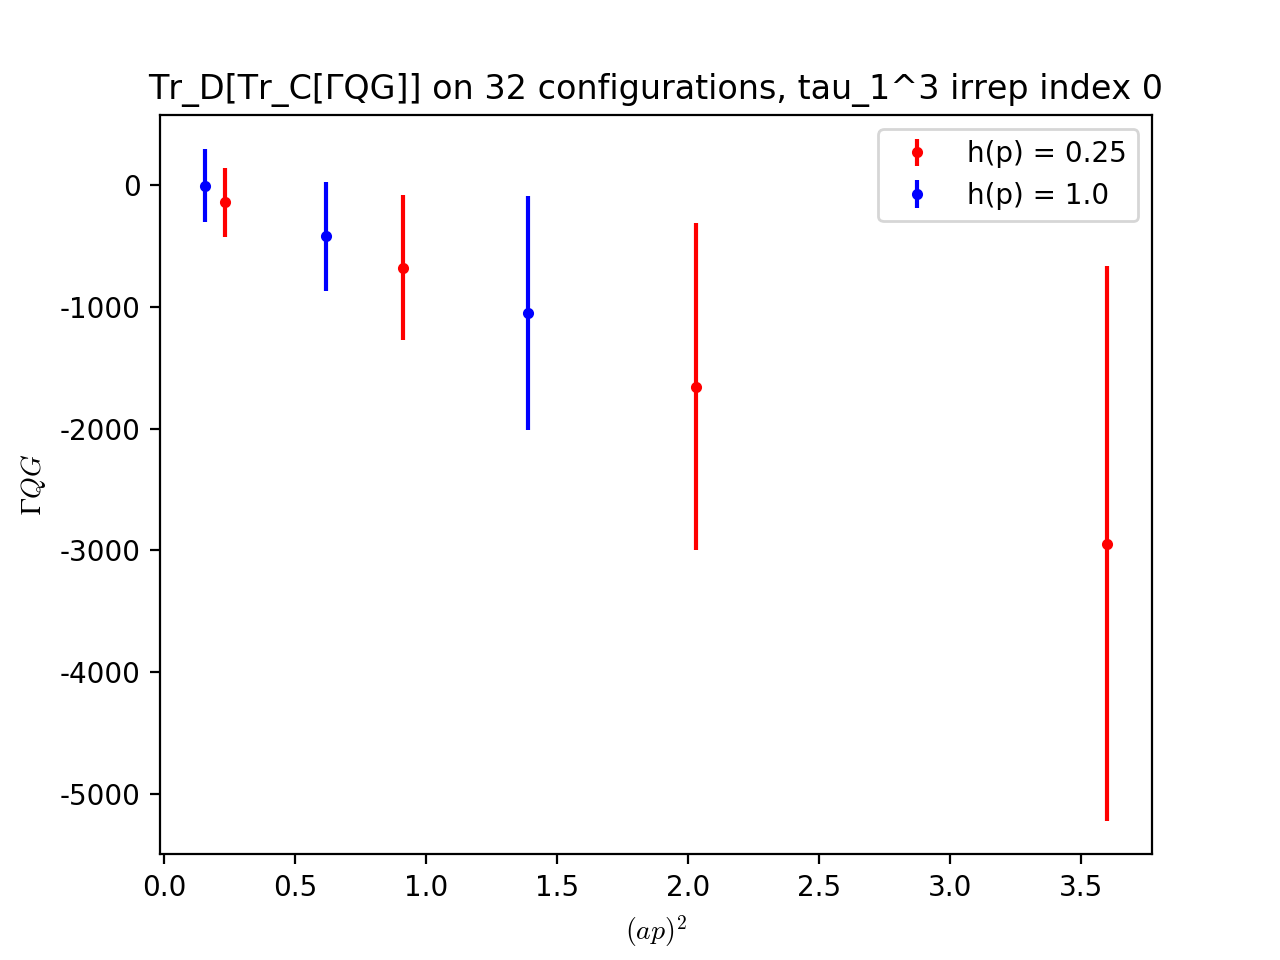

<IPython.core.display.Javascript object>


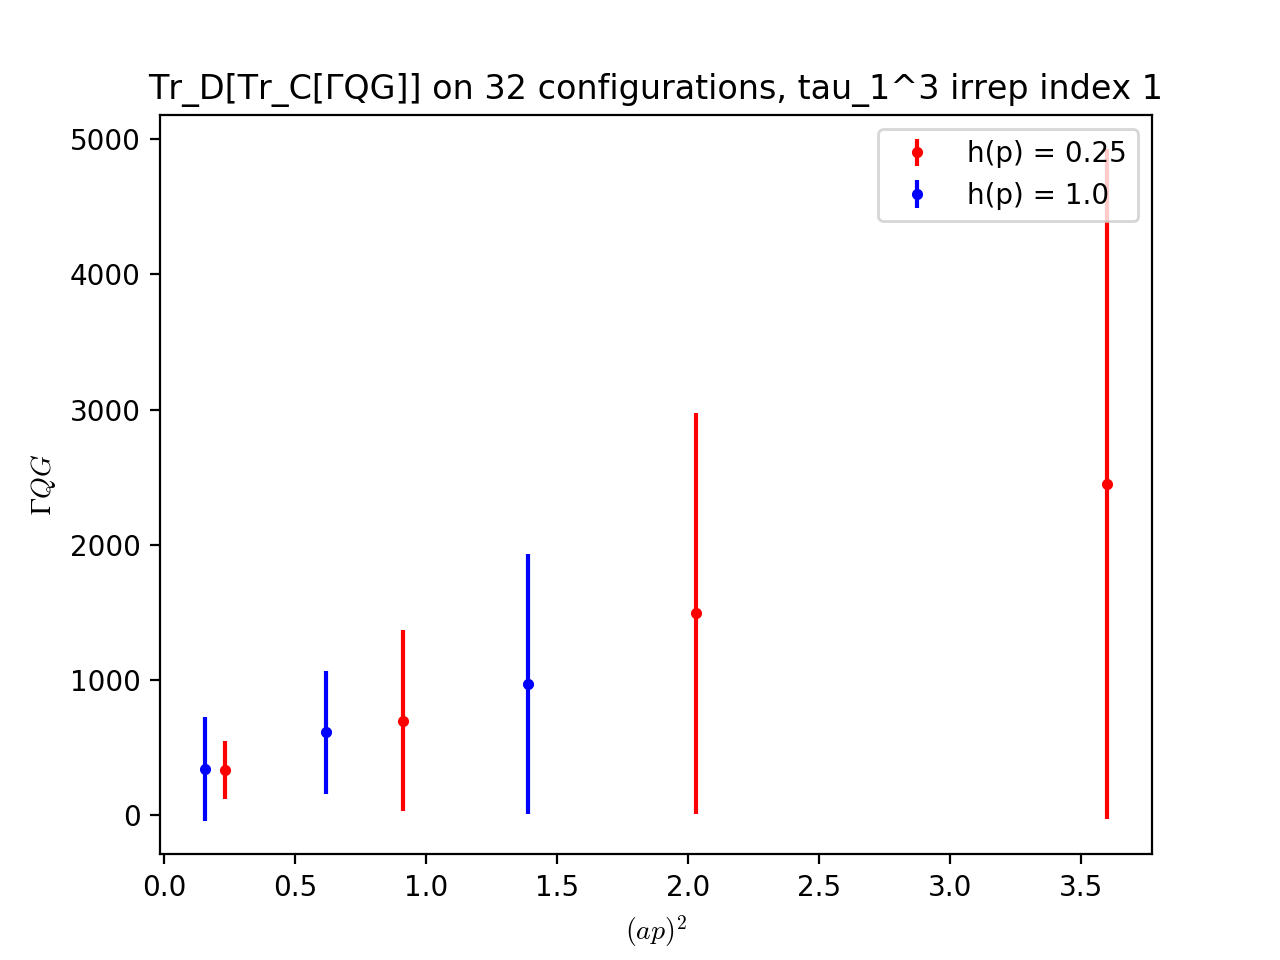

<IPython.core.display.Javascript object>


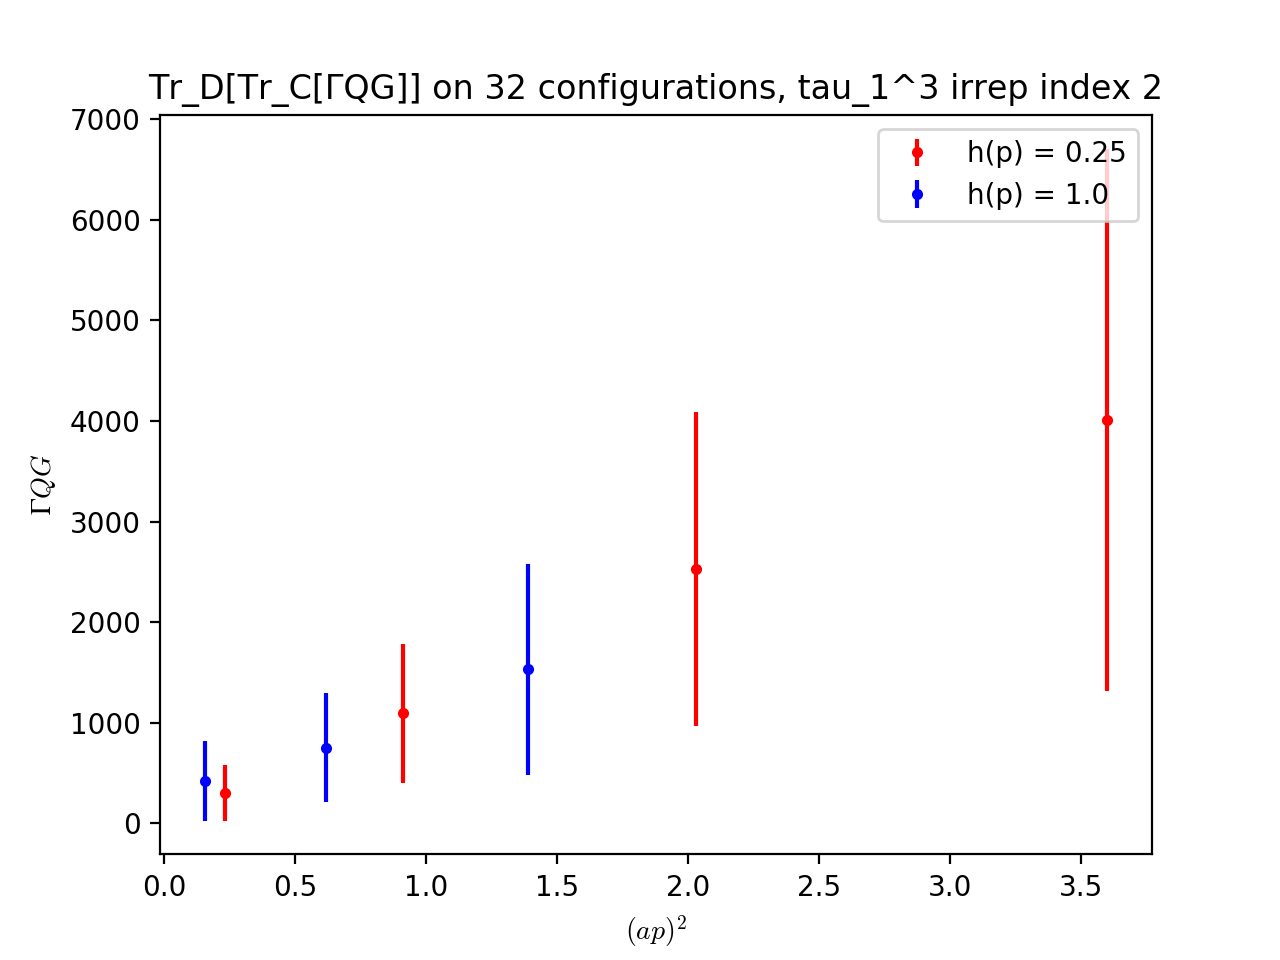

In [20]:
Gamma_qg3Tr = np.einsum('pyzaiai->ypz', Gamma_qg3)
Gamma_qg3Tr_mu = np.mean(Gamma_qg3Tr, axis = 2)
Gamma_qg3Tr_std = np.std(Gamma_qg3Tr, axis = 2, ddof = 1)

for a in range(3):
    plt.figure()
    plt.errorbar(apsq_list[:4], Gamma_qg3Tr_mu[a, :4], Gamma_qg3Tr_std[a, :4], c = 'r', fmt = '.', label = 'h(p) = 0.25')
    plt.errorbar(apsq_list[4:], Gamma_qg3Tr_mu[a, 4:], Gamma_qg3Tr_std[a, 4:], c = 'b', fmt = '.', label = 'h(p) = 1.0')

    plt.xlabel('$(ap)^2$')
    plt.ylabel('$ΓQG$')
    plt.title('Tr_D[Tr_C[ΓQG]] on 32 configurations, tau_1^3 irrep index ' + str(a))
    plt.legend()
    plt.show()

In [21]:
# Gamma_qq3_red = np.abs(np.einsum('...aiaj->...ij', Gamma_qq3))
# Gamma_qq_red_mu = np.mean(Gamma_qq3_red, axis = 2)
# Gamma_qq_red_std = np.std(Gamma_qq3_red, axis = 2, ddof = 1)

In [22]:
# plt.figure()
# plt.errorbar(apsq_list, Gamma_qq_red_mu[:, 0, 0, 0], Gamma_qq_red_std[:, 0, 0, 0], c = 'b', fmt = '.', label = '11')
# plt.errorbar(apsq_list, Gamma_qq_red_mu[:, 0, 0, 1], Gamma_qq_red_std[:, 0, 0, 1], c = 'r', fmt = '.', label = '12')
# plt.errorbar(apsq_list, Gamma_qq_red_mu[:, 0, 0, 2], Gamma_qq_red_std[:, 0, 0, 2], c = 'g', fmt = '.', label = '13')
# plt.errorbar(apsq_list, Gamma_qq_red_mu[:, 0, 0, 3], Gamma_qq_red_std[:, 0, 0, 3], c = 'k', fmt = '.', label = '14')

# plt.xlabel('$(ap)^2$')
# plt.ylabel('$Γ1_{1i}$')
# plt.title('Components of vertex function for $\mathcal{O}_{33} - \mathcal{O}_{44}$ on 15 configurations')
# plt.legend()
# plt.show()

## Playing with some actual data

In [23]:
# cfgs which had gf problems: 1020, 1100, 1190
# cfgs which had issues writing measurement to file: 1110, 1140, 1180

In [24]:
# for cfg_idx in range(1120, 1500, 10):
#     f2path = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/meas/cl21_48_96_b6p3_m0p2416_m0p2050_90712/cfg' + str(cfg_idx) + '.h5'
#     try:
#         f2 = h5py.File(f2path, 'r')
#         print('good file at ' + str(cfg_idx))
#         print(np.einsum('iiaa->', f2['Gqq/31/p3000'][()]))
#         f2.close()
#     except:
#         print('broken file at ' + str(cfg_idx))

In [25]:
# for cfg_idx in range(1120, 1500, 10):
#     f2path = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/meas/cl21_48_96_b6p3_m0p2416_m0p2050_90712/cfg' + str(cfg_idx) + '.h5'
#     try:
#         f2 = h5py.File(f2path, 'r')
#         print('good file at ' + str(cfg_idx))
#         print(f2['Gqq'])
#         f2.close()
#     except:
#         print('broken file at ' + str(cfg_idx))

In [26]:
# # f2path = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/meas/cl21_48_96_b6p3_m0p2416_m0p2050_89157/cfg1110.h5'
# # f2path = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/meas/cl21_48_96_b6p3_m0p2416_m0p2050_90712/cfg1240.h5'
# f2path = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/meas/cfg1140.h5'
# f2 = h5py.File(f2path, 'r')
# print(f2['Gqq/31/p6000'][()])
# f2.close()

In [27]:
# # some of the files are corrupted, which you can check in the slurm output (although they still wrote to the file). 
# # however, some of them are working fine. Going to try to run on the bad files with more nodes and see what happens
# # for the corrupted files, see what the correlator orders of magnitude are-- currently one Gqq for 1140 (one of the 
# # ones which errored) is having some major issues
# fpath = '/Users/theoares/Dropbox (MIT)/research/gq_mixing/meas/cl21_48_96_b6p3_m0p2416_m0p2050_89127/cfg1050.h5'
# f = h5py.File(fpath, 'r')
# print(f['Gqq/31/p6000'][()])

In [28]:
# f['prop/p2222'][()]